In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss

In [3]:
#py -3.12 -m pip install <package>
#scikit-learn

# FIRST TEST

In [4]:
# Load the dataset to inspect its structure
file_path = 'Input_data_timeseries.xlsx'
data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
data.sheet_names


['db']

In [5]:
# Load the data from the 'db' sheet
data_db = data.parse('db')

# Display the first few rows to understand its structure
data_db.head()


,ROUTE,ORDER DATE,NUMBER OF ACTUAL ORDERS
0,BELGIUM__BELGIUM,2022-01-01,0
1,BELGIUM__BELGIUM,2022-01-02,0
2,BELGIUM__BELGIUM,2022-01-03,0
3,BELGIUM__BELGIUM,2022-01-04,1
4,BELGIUM__BELGIUM,2022-01-05,3


In [6]:
# Get unique routes and their counts
unique_routes = data_db['ROUTE'].nunique()
route_counts = data_db['ROUTE'].value_counts()

unique_routes, route_counts
display(route_counts)

ROUTE
BELGIUM__BELGIUM                        1735
ITALY_NORTH_WEST__GREAT_BRITAIN         1735
ITALY_NORTH_WEST__EAST_NORTH            1735
ITALY_NORTH_WEST__EAST_BALCAN           1735
ITALY_NORTH_WEST__GERMANY_SOUTH         1735
                                        ... 
EAST_NORTH__EAST_NORTH                  1735
EAST_NORTH__GERMANY_RUHR                1735
EAST_BALCAN__ITALY_NORTH_WEST           1735
EAST_BALCAN__ITALY_NORTH_EAST_CENTER    1735
SCANDINAVIA__ITALY_SOUTH                1735
Name: count, Length: 98, dtype: int64

In [7]:
# Filter data for the route "BELGIUM__BELGIUM"
route_data = data_db[data_db['ROUTE'] == 'BELGIUM__BELGIUM']

# Convert the ORDER DATE column to datetime format
route_data['ORDER DATE'] = pd.to_datetime(route_data['ORDER DATE'])

# Sort data by date
route_data = route_data.sort_values('ORDER DATE')

# Set the ORDER DATE as the index for time series analysis
route_data.set_index('ORDER DATE', inplace=True)

# Display the first few rows of the prepared data
route_data.head()


C:\Users\elped\AppData\Local\Temp\ipykernel_7444\3523993727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_data['ORDER DATE'] = pd.to_datetime(route_data['ORDER DATE'])


,ROUTE,NUMBER OF ACTUAL ORDERS
ORDER DATE,,
2022-01-01,BELGIUM__BELGIUM,0
2022-01-01,BELGIUM__BELGIUM,0
2022-01-01,BELGIUM__BELGIUM,0
2022-01-01,BELGIUM__BELGIUM,0
2022-01-01,BELGIUM__BELGIUM,1


# SECOND TEST

## ANALISI DATI

In [8]:
# Load the dataset
file_path = 'Input_data_timeseries (version 1).xlsx'  # Replace with your file's path
data = pd.read_excel(file_path, sheet_name='db')
display(data)

,ROUTE,ORDER DATE,NUMBER OF ACTUAL ORDERS
0,BELGIUM__BELGIUM,2022-12-13,4
1,BELGIUM__BELGIUM,2022-12-13,1
2,BELGIUM__BELGIUM,2022-12-13,7
3,BELGIUM__BELGIUM,2022-12-13,19
4,BELGIUM__BELGIUM,2022-12-13,22
...,...,...,...
170027,SCANDINAVIA__ITALY_SOUTH,2022-01-01,0
170028,SCANDINAVIA__ITALY_SOUTH,2022-01-01,0
170029,SCANDINAVIA__ITALY_SOUTH,2022-01-01,0
170030,NaN,NaT,772574


In [9]:
#check info
data.info()
#check null values
data.isna().sum()
#le ultime due righe anno i valori nulli, semprano dei totali,
#uno è totale di ordini, l'altro non so!!(CHIEDERE!!)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170032 entries, 0 to 170031
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ROUTE                    170030 non-null  object        
 1   ORDER DATE               170030 non-null  datetime64[ns]
 2   NUMBER OF ACTUAL ORDERS  170032 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.9+ MB


ROUTE                      2
ORDER DATE                 2
NUMBER OF ACTUAL ORDERS    0
dtype: int64

prendo i dati per un solo tipo di tragitto e sommo tutti queli giorni con multipli ordini !!!!!!!!!!!! esempio 2022-01-01 ha 5 ordini, li sommo tutti e creo un unico dato

In [10]:
# Filter data for a single route (e.g., "BELGIUM__BELGIUM")
route = data[data['ROUTE'] == 'BELGIUM__BELGIUM']

# Convert ORDER DATE to datetime format
route['ORDER DATE'] = pd.to_datetime(route['ORDER DATE'])
display(route)

# Sort and set the index
route = route.sort_values('ORDER DATE').set_index('ORDER DATE')
display(route)

# Check the first few rows
print(route.head())

#TIME = route.index.unique()
#for i in TIME:
    #print(route[route.index == i]) #like we can see for each day we have 5 possible order from 5 different company (non credo vada bene per una time series quindi sommo tutto)
# so we try to sum
route_data = pd.pivot_table(route, index=route.index, values='NUMBER OF ACTUAL ORDERS', aggfunc='sum')
display(route_data)
#route_data = route


C:\Users\elped\AppData\Local\Temp\ipykernel_7444\836811219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['ORDER DATE'] = pd.to_datetime(route['ORDER DATE'])


,ROUTE,ORDER DATE,NUMBER OF ACTUAL ORDERS
0,BELGIUM__BELGIUM,2022-12-13,4
1,BELGIUM__BELGIUM,2022-12-13,1
2,BELGIUM__BELGIUM,2022-12-13,7
3,BELGIUM__BELGIUM,2022-12-13,19
4,BELGIUM__BELGIUM,2022-12-13,22
...,...,...,...
169540,BELGIUM__BELGIUM,2022-01-01,0
169541,BELGIUM__BELGIUM,2022-01-01,0
169542,BELGIUM__BELGIUM,2022-01-01,0
169543,BELGIUM__BELGIUM,2022-01-01,1


,ROUTE,NUMBER OF ACTUAL ORDERS
ORDER DATE,,
2022-01-01,BELGIUM__BELGIUM,0
2022-01-01,BELGIUM__BELGIUM,0
2022-01-01,BELGIUM__BELGIUM,1
2022-01-01,BELGIUM__BELGIUM,0
2022-01-01,BELGIUM__BELGIUM,0
...,...,...
2022-12-13,BELGIUM__BELGIUM,22
2022-12-13,BELGIUM__BELGIUM,19
2022-12-13,BELGIUM__BELGIUM,7


                       ROUTE  NUMBER OF ACTUAL ORDERS
ORDER DATE                                           
2022-01-01  BELGIUM__BELGIUM                        0
2022-01-01  BELGIUM__BELGIUM                        0
2022-01-01  BELGIUM__BELGIUM                        1
2022-01-01  BELGIUM__BELGIUM                        0
2022-01-01  BELGIUM__BELGIUM                        0


,NUMBER OF ACTUAL ORDERS
ORDER DATE,
2022-01-01,1
2022-01-02,0
2022-01-03,50
2022-01-04,41
2022-01-05,49
...,...
2022-12-09,51
2022-12-10,5
2022-12-11,0


,NUMBER OF ACTUAL ORDERS
ORDER DATE,
2022-01-01,1
2022-01-02,0
2022-01-03,50
2022-01-04,41
2022-01-05,49
2022-01-06,55
2022-01-07,56
2022-01-08,2
2022-01-09,0


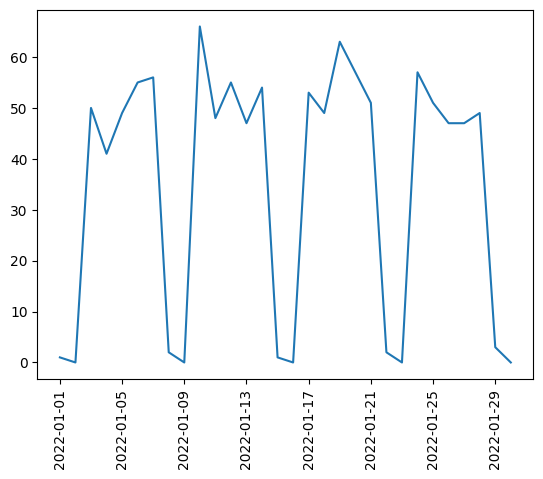

In [11]:
only_one_month = route_data.loc['2022-01-01':'2022-01-30']
display(only_one_month)

plt.plot(route_data.loc['2022-01-01':'2022-01-30','NUMBER OF ACTUAL ORDERS'])
plt.xticks(rotation=90)
plt.show()

ok come possiamo vedere dal grafico per BELGIUM-BELGIUM nel mese di gennaio sono presenti dei TRENDS o SEASONALITY!!! ipotizio che possa essere cosi anche per altri percorsi/mesi
CREDO NON SONO SICURO, FARE DEI TEST

PROVARE A FARE UN TEST PER LA STATIONARITA E IN CASO APPLICARE LA DIFFERENZIAZIONE!!

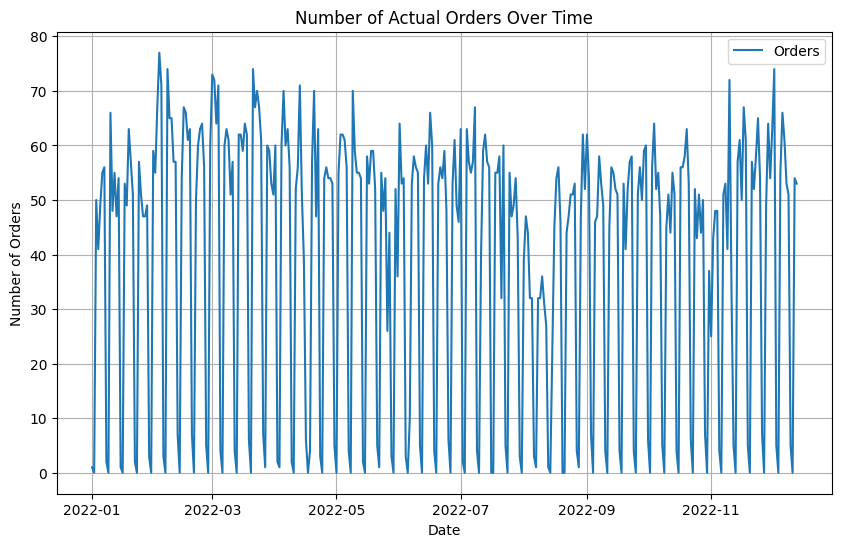

In [12]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(route_data.index, route_data['NUMBER OF ACTUAL ORDERS'], label='Orders')
plt.title('Number of Actual Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid()
plt.show()


In [13]:
route_data.loc['2022-01-01':'2022-01-30'] #PERCHE HO PIù ORDINI IN UN GIORNO ???? SONO DIVERSE CLIENTI???

,NUMBER OF ACTUAL ORDERS
ORDER DATE,
2022-01-01,1
2022-01-02,0
2022-01-03,50
2022-01-04,41
2022-01-05,49
2022-01-06,55
2022-01-07,56
2022-01-08,2
2022-01-09,0


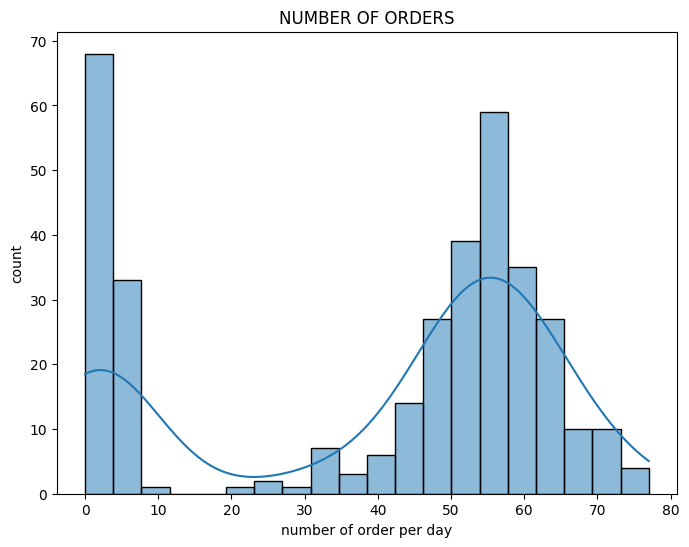

In [14]:
#PLOTS OF FEATURES
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
s_feature = sns.histplot(route_data['NUMBER OF ACTUAL ORDERS'], bins=20, kde=True,ax = ax)
s_feature.set_title('NUMBER OF ORDERS')
s_feature.set_xlabel('number of order per day')
s_feature.set_ylabel('count')
plt.show()


In [15]:
#correlation
#corr = route_data.corr()
#sns.heatmap(corr,annot=True,cmap='Blues')

## monthly information 

<Axes: >

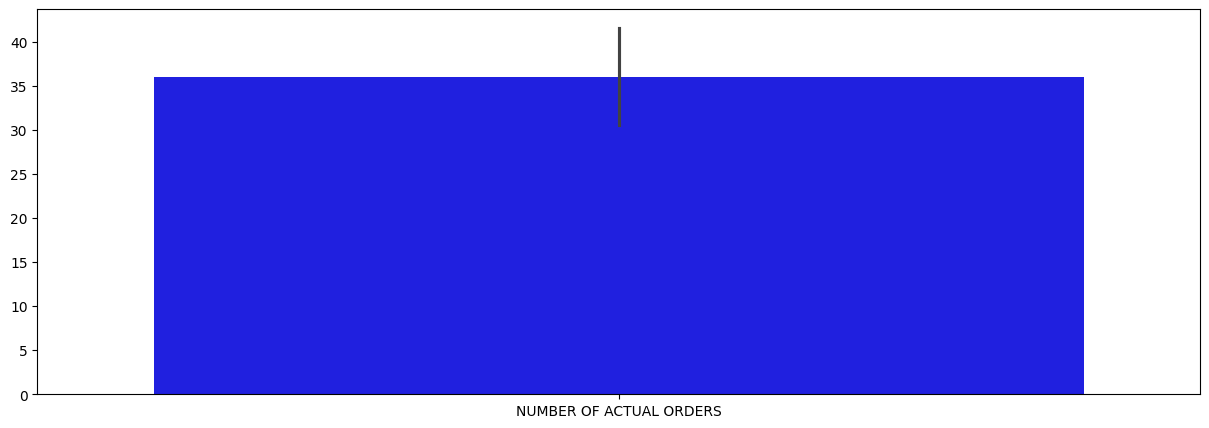

In [16]:
month_df_avg = route_data['NUMBER OF ACTUAL ORDERS'].resample('1ME').mean().add_suffix('_avg')
month_df_min = route_data['NUMBER OF ACTUAL ORDERS'].resample('1ME').min().add_suffix('_min')
month_df_max = route_data['NUMBER OF ACTUAL ORDERS'].resample('1ME').max().add_suffix('_max')
sns.color_palette('pastel')
month_df = pd.concat([month_df_avg, month_df_min, month_df_max], axis=1)
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(month_df['NUMBER OF ACTUAL ORDERS'], color='blue', ax=ax)


## split of the data
so i have to predict the next number of order form a specific track.
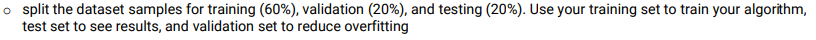

In [17]:
# Define proportions
train_size = int(len(route_data) * 0.6)
val_size = int(len(route_data) * 0.2)

# Split the data
train = route_data.iloc[:train_size] #60%
val = route_data.iloc[train_size:train_size + val_size] #20%
test = route_data.iloc[train_size + val_size:] #20%

print(f"Training size: {len(train)}, Validation size: {len(val)}, Test size: {len(test)}")


Training size: 208, Validation size: 69, Test size: 70


## Approach method
-   Check for stationarity of the data
-   Determine the seasonality of the data
-   Make the data stationary by applying differenciation
-   Perform ACF and PACF analysis to gather the parameters for the model part
-   Train the models and get the predictions
-   Compare the models used by MAE and MSE and AIC

To determine if our data is stationary or not we have to use the KPSS and the ADFuller tests which have different hypothesis and can be done separated.

## Test Stationary

In [18]:
#Execute an AdFuller test on the data. If the p-value is less than <=0.05 the data is stationary, otherwise it is not.
def adfuller_test(data):
  adf_test = adfuller(data,autolag='AIC') # AIC is the default option
  print('ADF Statistic:', adf_test[0])
  print('p-value: ', adf_test[1])
  print('Critical Values:')
  for key, value in adf_test[4].items():
      print('\t%s: %.3f' % (key, value))
  if adf_test[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is non-stationary')
#Execute a KPSS test on the data passed by the argument. If the p-value is less than 0.05 then null hypothesis cannot be rejected
# and that's means the data is not trend stationary, otherwise is trend stationary.
def kpss_test(data):
  #kpss_out = kpss(data,regression='ct', nlags='auto', store=True) #i have a warning becouse my test statistic is extrimely small 
  #so i use a different configuration for the KPSS
  kpss_out = kpss(data,regression='c', nlags=20, store=True)
  print('KPSS Statistic:', kpss_out[0])
  print('p-value: ', kpss_out[1])
  if kpss_out[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is not trend stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is trend stationary')

Remember

Important Note: These two tests are not interchangeble, considering their different assumptions/null hypotheses. It is always better to apply both of them, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:
-   Case 1: Both tests conclude that the series is not stationary - The series is not stationary.

-   Case 2: Both tests conclude that the series is stationary - The series is stationary.

-   Case 3: KPSS indicates stationarity and ADF indicates non-stationarity -> The series is trend stationary: it requires operations to remove the trend. The resulting detrended series is checked for stationarity.

-   Case 4: KPSS indicates non-stationarity and ADF indicates stationarity -> The series is difference stationary: it requires differencing. The differenced series is checked for stationarity.

In [19]:
adfuller_test(train['NUMBER OF ACTUAL ORDERS']) #provare con la versione di solo un mese
kpss_test(train['NUMBER OF ACTUAL ORDERS']) # provare con la versione solo un mese

ADF Statistic: -2.0987622730826447
p-value:  0.2450125889042029
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575
We cannot reject the null hypothesis (H0) --> data is non-stationary
KPSS Statistic: 0.23344830930537744
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary


C:\Users\elped\AppData\Local\Temp\ipykernel_7444\756813540.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_out = kpss(data,regression='c', nlags=20, store=True)


a quanto sembra i dati sono stationary (SE NON FACCIO IL SUM) quindi non devo applicre differenziazione o rimozione di trend!!
altrimenti CON il SUM i dati per ADF non sono stationary, per KPSS sono stationary quindi: the series is trend stationary, we have to remove the trend. 
we have to detrended and re check the stationary

### de-trend!!!!

In [20]:
#fare il de trend

In [21]:
# Differencing the data
#data_diff = data['NUMBER OF ACTUAL ORDERS'].diff().dropna()

# Reapply KPSS
#kpss_test(data_diff)


## save value for model accuracy


In [22]:

df_metrics = pd.DataFrame(columns=['Model_name','AIC','MAE','RMSE','MAPE'])
display(df_metrics)

,Model_name,AIC,MAE,RMSE,MAPE


## try to apply a model ARIMA
AR = autoregression
I = differencing
MA = moving average

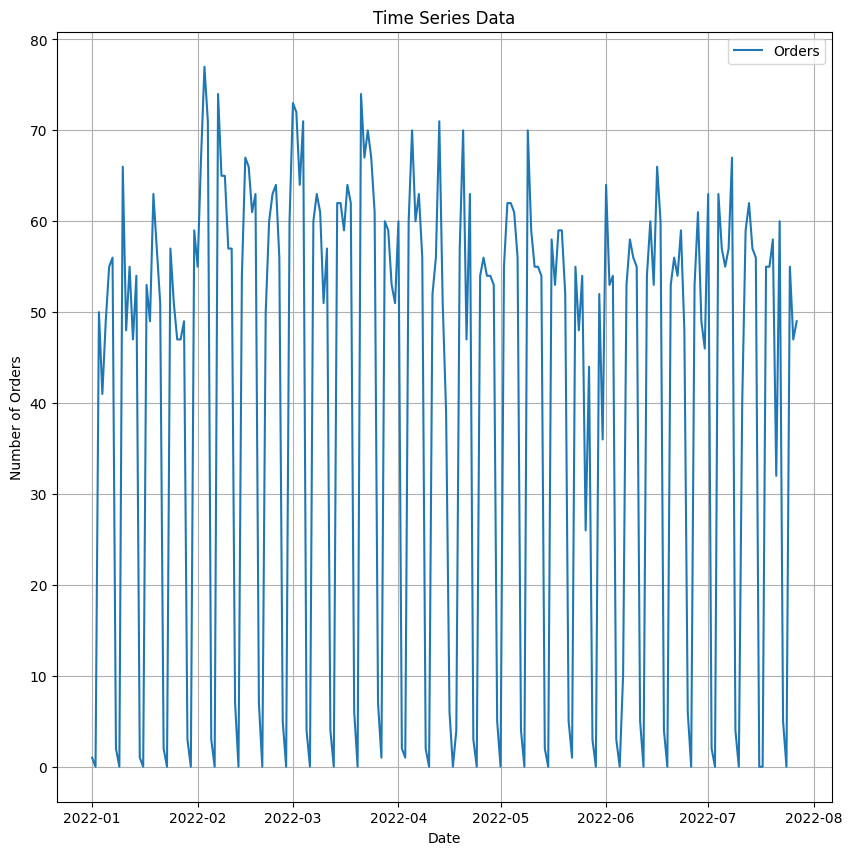

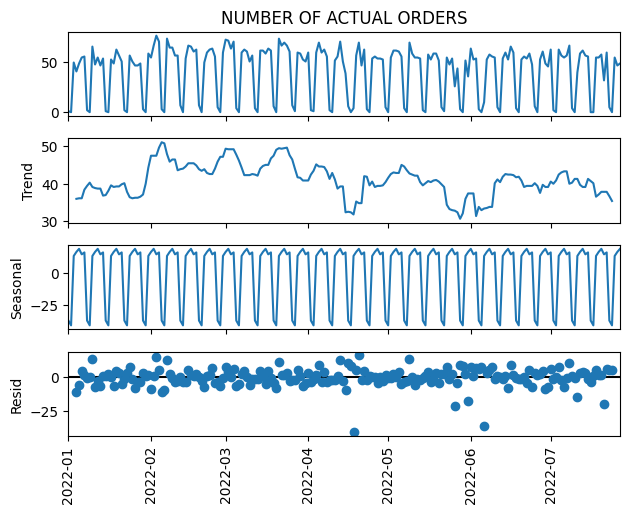

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot time series
plt.figure(figsize=(10, 10))
plt.plot(train.index, train['NUMBER OF ACTUAL ORDERS'], label='Orders')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid()
plt.show()

# Decompose the time series (if needed)
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train['NUMBER OF ACTUAL ORDERS'], model='additive', period=7)
result.plot()
plt.xticks(rotation=90)
plt.show()


### try to understand the best parameters to use for ARIMA

examine the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to get an idea of p and q

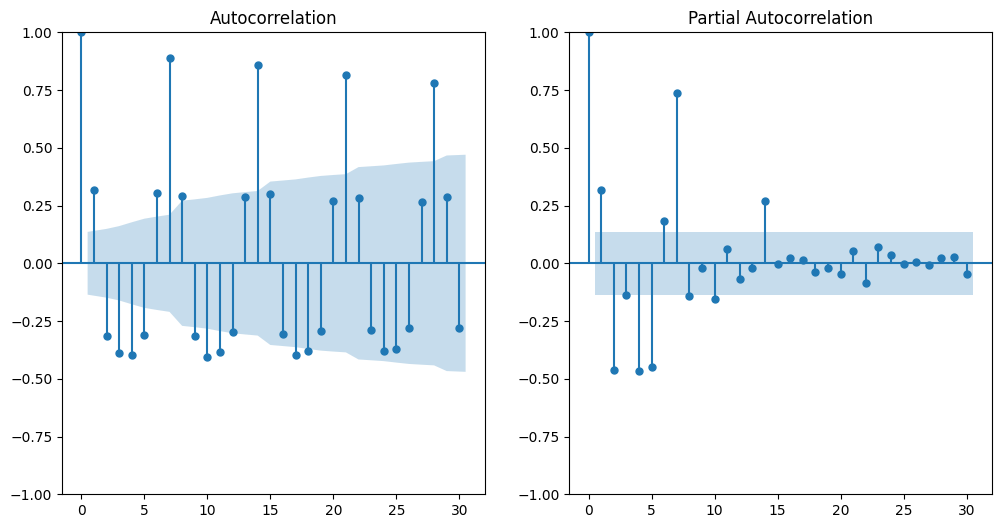

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(train['NUMBER OF ACTUAL ORDERS'], lags=30, ax=plt.subplot(121))
plot_pacf(train['NUMBER OF ACTUAL ORDERS'], lags=30, ax=plt.subplot(122))
plt.show()


In [25]:
#use a range of possible values for p,d, and q, and evaluate each combination

import warnings
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

warnings.filterwarnings("ignore")  # To suppress convergence warnings

# Define the range for p, d, q
p = range(0, 5)  # Test values for AR terms
d = range(0, 2)  # Test values for differencing
q = range(0, 5)  # Test values for MA terms

# Track the best combination
best_aic = float("inf")
best_order = None
results = []

# Perform grid search
for i in p:
    for j in d:
        for k in q:
            try:
                # Fit ARIMA model
                model = ARIMA(train['NUMBER OF ACTUAL ORDERS'], order=(i, j, k))
                model_fit = model.fit()
                
                # Record the AIC value
                aic = model_fit.aic
                results.append(((i, j, k), aic))
                
                # Update best model
                if aic < best_aic:
                    best_aic = aic
                    best_order = (i, j, k)
            except:
                continue

# Display the best order
print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")


Best ARIMA order: (4, 0, 4) with AIC: 1594.0751275967746


In [26]:
# Fit the best ARIMA model
best_model = ARIMA(train['NUMBER OF ACTUAL ORDERS'], order=best_order)
best_model_fit = best_model.fit()

# Display the summary
print(best_model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     NUMBER OF ACTUAL ORDERS   No. Observations:                  208
Model:                      ARIMA(4, 0, 4)   Log Likelihood                -787.038
Date:                     Sat, 23 Nov 2024   AIC                           1594.075
Time:                             20:20:19   BIC                           1627.451
Sample:                         01-01-2022   HQIC                          1607.570
                              - 07-27-2022                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.9583      0.768     53.314      0.000      39.453      42.464
ar.L1          0.8038      0.003    246.974      0.000       0.797       0.810
ar.L2       

VECCHIO CASO (SENZA SUMM) RICONTROLLARE QUELLO NUOVO
d=0 (no differencing, as the series is stationary).
q=2 (2 moving average terms).

Coefficients:

The AR (𝑝) and MA (𝑞) terms all have significant p-values (< 0.05), suggesting that these lags contribute meaningfully to the model.
Constant (c): The mean value of the series, ~8.15, aligns with the data's general behavior.

Goodness-of-Fit Metrics:

AIC: 7336.18 — A measure of model quality; lower values indicate better fit.
BIC: 7375.77 — Similar to AIC but penalizes model complexity more.
Log Likelihood: -3660.09 — Indicates how well the model explains the data.

Error Variance (σ^2):

The variance of residuals (𝜎2=66.29) indicates the spread of errors.

Diagnostics:

Ljung-Box (Q): p-value of 0.93 suggests residuals are uncorrelated, which is desirable.
Jarque-Bera (JB): p-value of 0.00 suggests residuals are not normally distributed (possibly due to skewness or kurtosis).
Heteroskedasticity (H): p-value of 0.00 suggests residuals are not homoscedastic (variance changes over time).

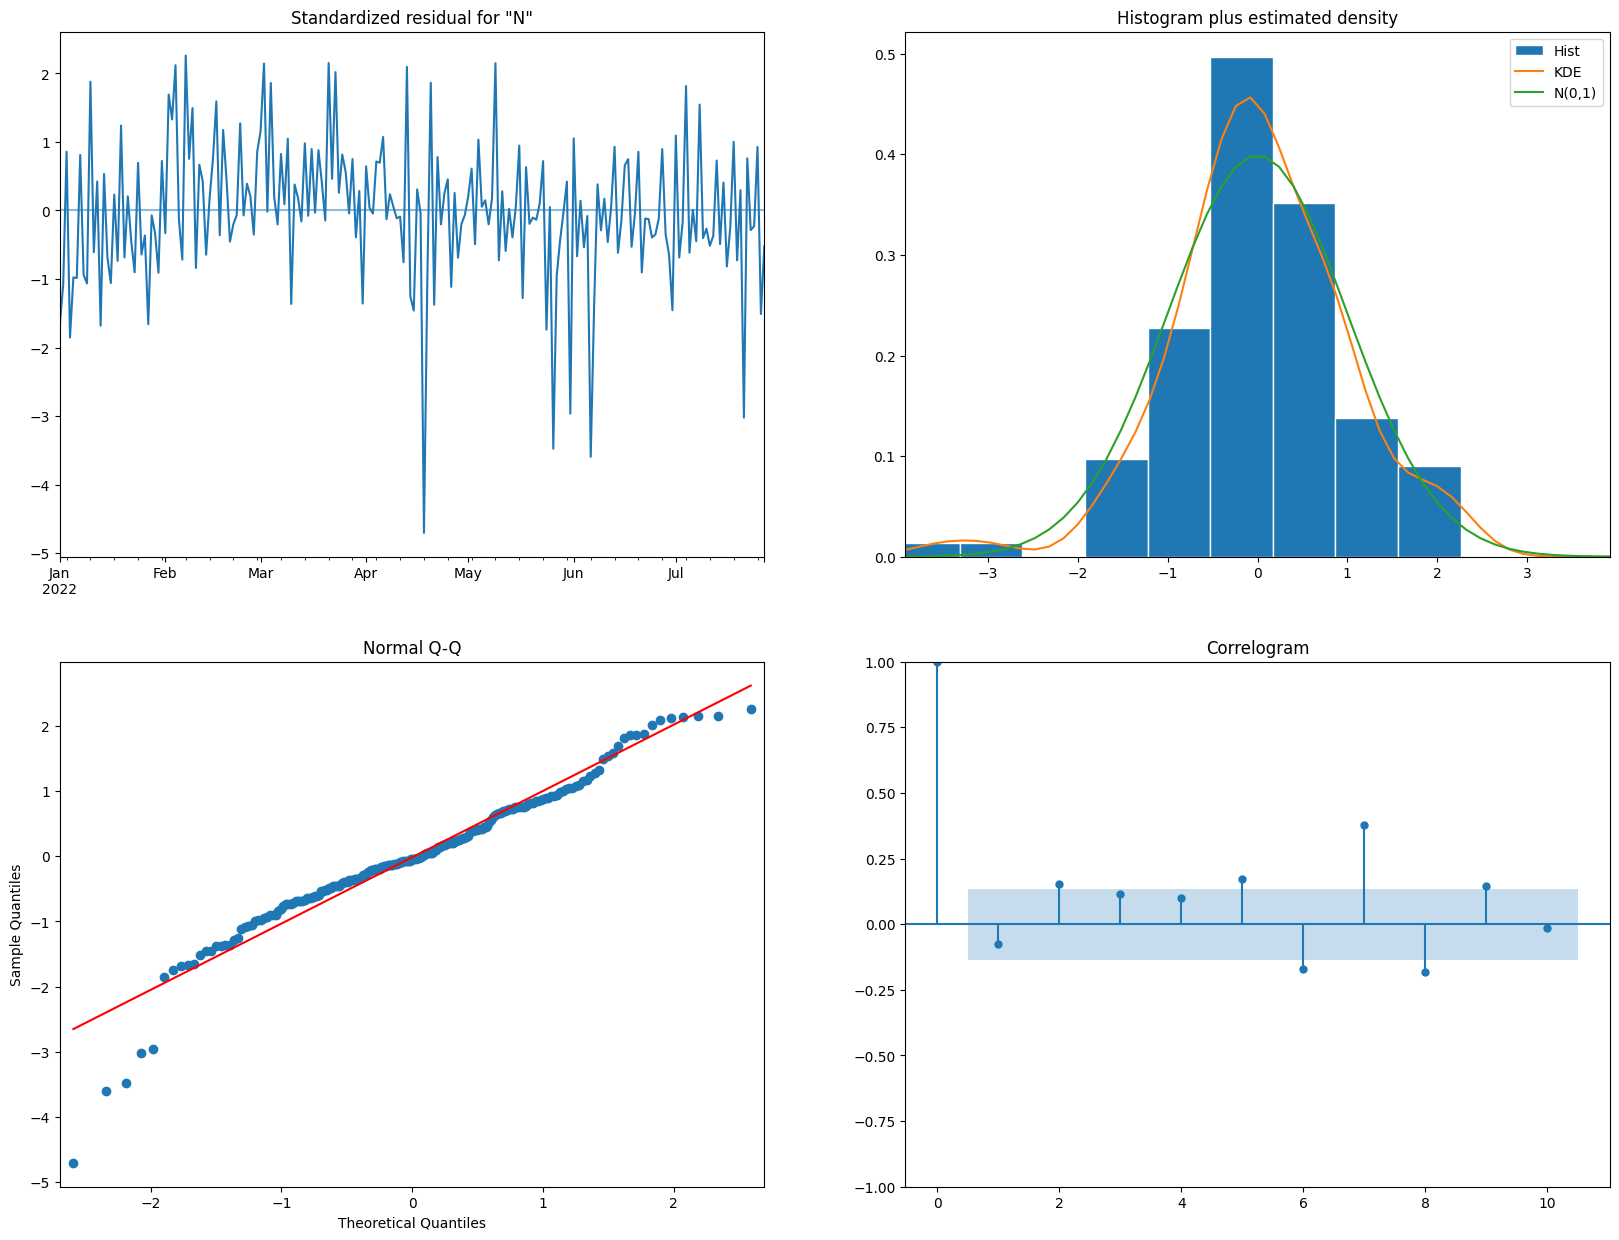

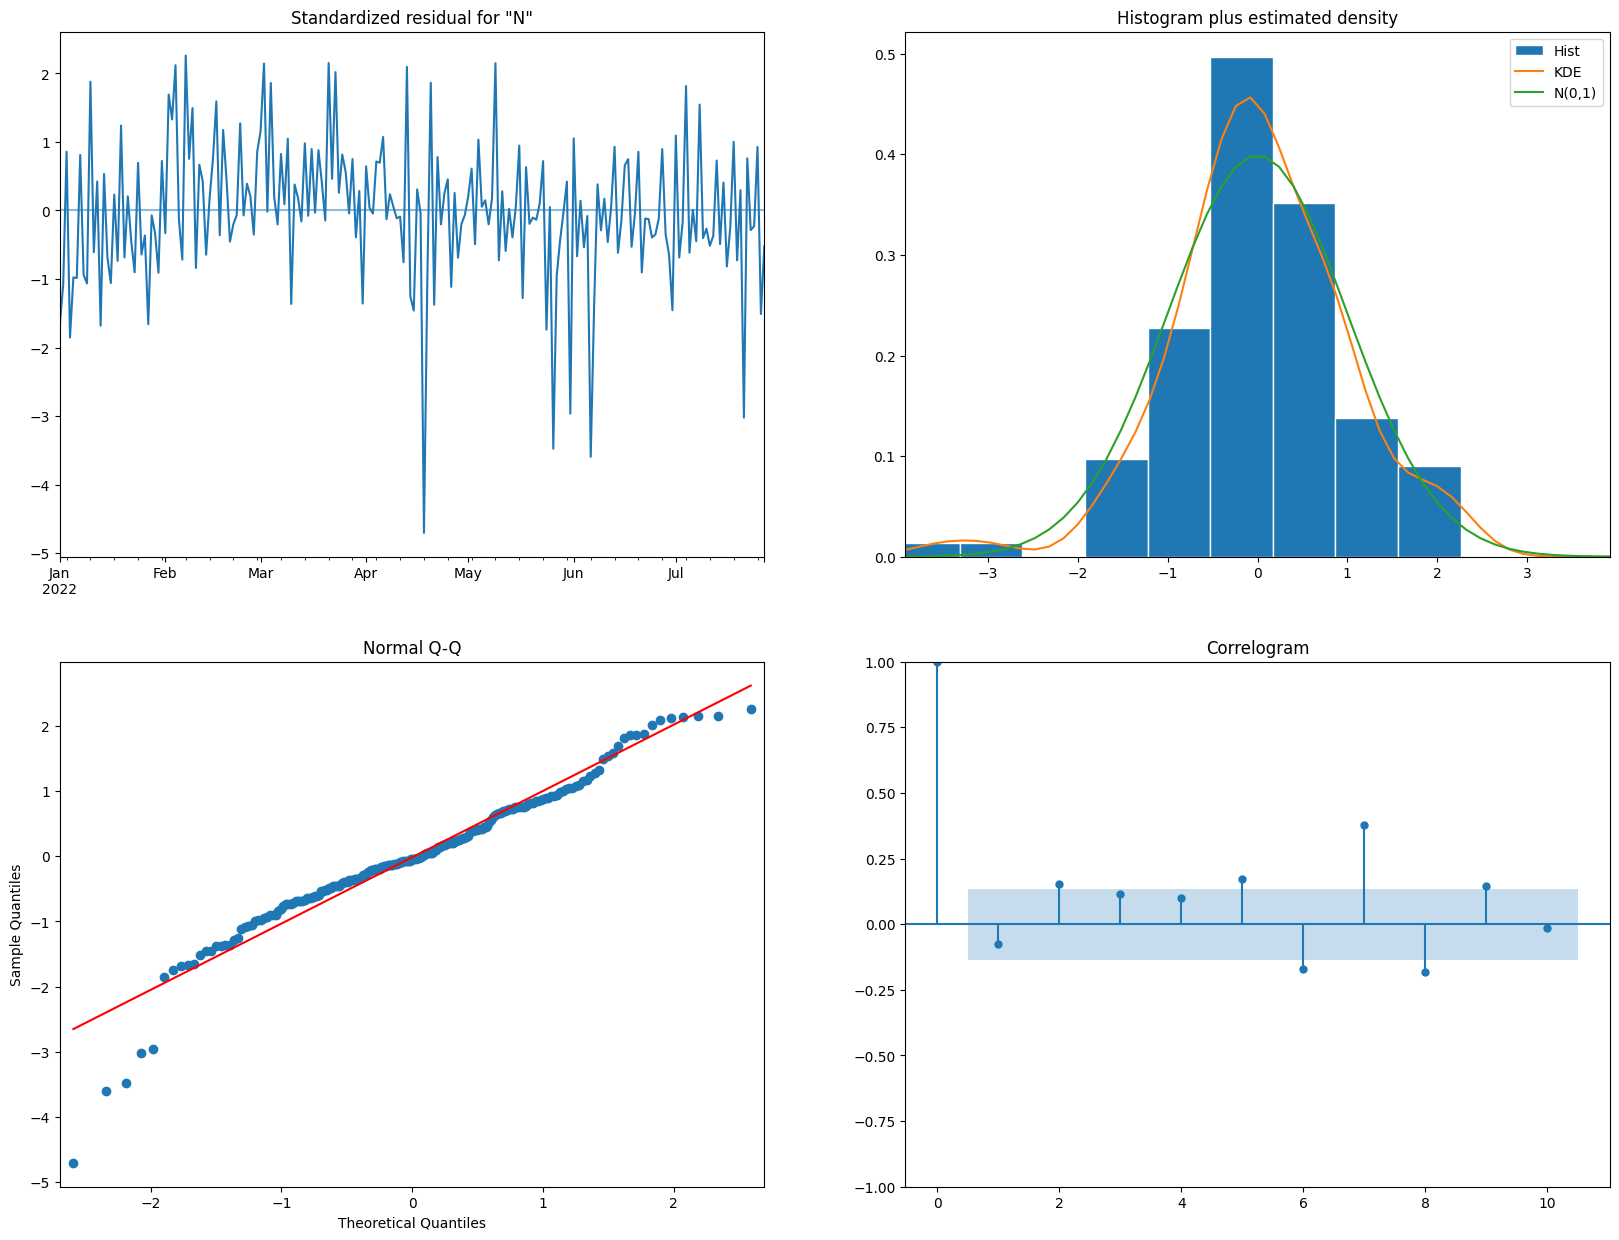

In [27]:
best_model_fit.plot_diagnostics(figsize=(20,15))

### try to interpret and improve


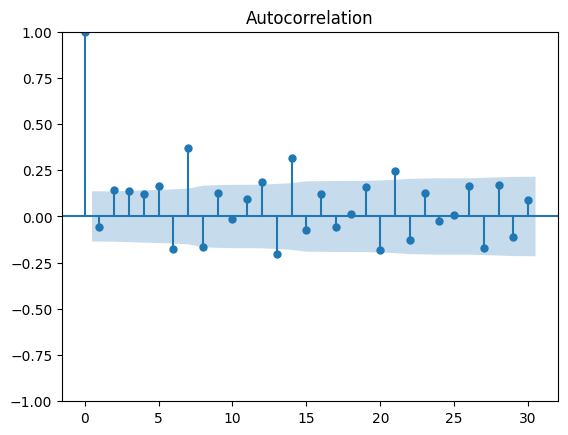

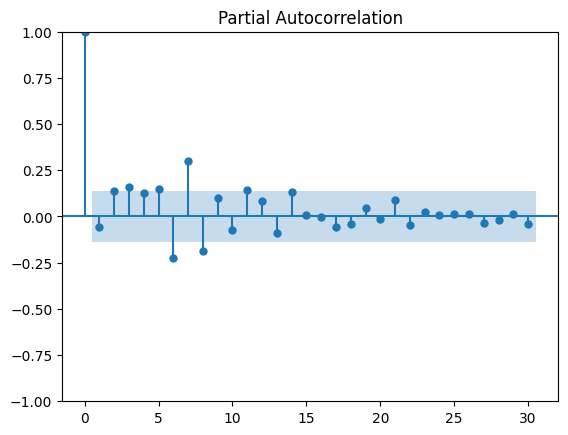

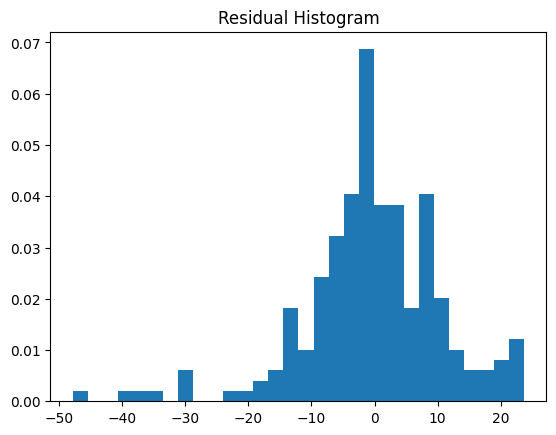

In [28]:
# check the residuals: ensure residuals are white noise (uncorrelated and normal distributed)
import statsmodels.api as sm

residuals = best_model_fit.resid
sm.graphics.tsa.plot_acf(residuals, lags=30)
sm.graphics.tsa.plot_pacf(residuals, lags=30)
plt.show()

# Histogram
plt.hist(residuals, bins=30, density=True)
plt.title("Residual Histogram")
plt.show()


VECCHI VALORI (SENZA SUM) RIFARE 
1. **Autocorrelation Function (ACF) Plot**:  
   - Most residual lags fall within the confidence interval (shaded area), suggesting that the residuals are largely uncorrelated.  
   - This is a good sign for model adequacy, as it means the ARIMA model has captured most of the temporal patterns in the data.

2. **Partial Autocorrelation Function (PACF) Plot**:  
   - Similar to the ACF, no significant spikes are observed outside the confidence bounds, confirming that there is no remaining autocorrelation in the residuals.  

3. **Residual Histogram**:  
   - The residuals are slightly skewed to the right (long tail on the positive side).  
   - This might cause minor deviations from normality, as indicated in the Jarque-Bera test in your earlier results.  
   - While not ideal, ARIMA models are robust to mild deviations from normality, so this should not significantly affect the forecast quality.


### try to forecast the next week

In [29]:
# Forecast the next 7 days (or adjust the 'steps' based on the length of your test set)
forecast_steps = len(test)  # Number of points in your test set
#forecast_steps = 7
forecast = best_model_fit.forecast(steps=forecast_steps)
forecast.index = test.index  # Match the index of the test set for easy comparison

# Print forecasted values
print("Forecasted values:\n", forecast)


Forecasted values:
 ORDER DATE
2022-10-05    62.788458
2022-10-06    51.800055
2022-10-07     8.004763
2022-10-08     3.148130
2022-10-09    45.062588
                ...    
2022-12-09     9.191246
2022-12-10     3.153193
2022-12-11    43.367563
2022-12-12    60.907833
2022-12-13    54.918063
Name: predicted_mean, Length: 70, dtype: float64


In [30]:
# try to validate
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test['NUMBER OF ACTUAL ORDERS'], forecast))
mae = mean_absolute_error(test['NUMBER OF ACTUAL ORDERS'], forecast)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Root Mean Squared Error (RMSE): 25.39027517774515
Mean Absolute Error (MAE): 18.345490989274328


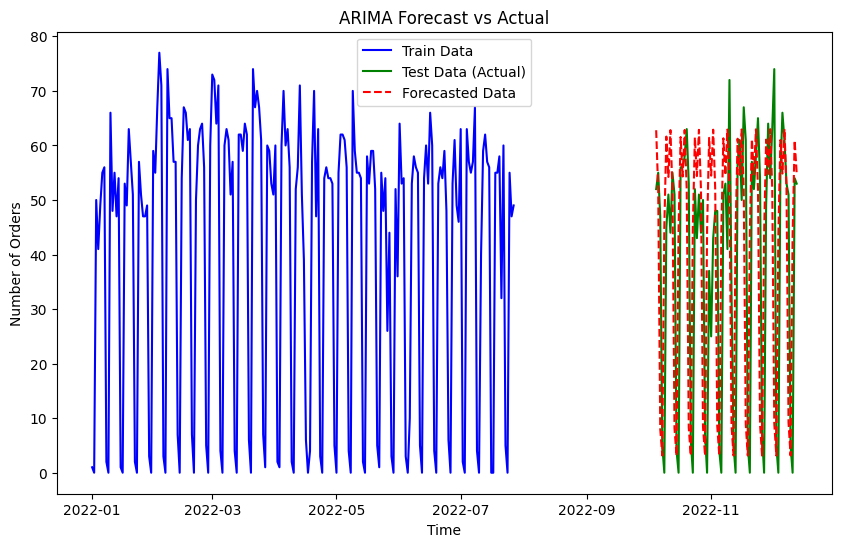

In [31]:
#try to visualize
import matplotlib.pyplot as plt

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['NUMBER OF ACTUAL ORDERS'], label='Train Data', color='blue')
plt.plot(test.index, test['NUMBER OF ACTUAL ORDERS'], label='Test Data (Actual)', color='green')
plt.plot(forecast.index, forecast, label='Forecasted Data', color='red', linestyle='--')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Time")
plt.ylabel("Number of Orders")
plt.show()


## MODEL

In [32]:
from sklearn.model_selection import train_test_split

# Define proportions
train_size = int(len(route_data) * 0.6)
val_size = int(len(route_data) * 0.2)

# Split the data
train = route_data.iloc[:train_size]
val = route_data.iloc[train_size:train_size + val_size]
test = route_data.iloc[train_size + val_size:]

print(f"Training size: {len(train)}, Validation size: {len(val)}, Test size: {len(test)}")


Training size: 208, Validation size: 69, Test size: 70


In [33]:
ARIMA?

Init signature:
ARIMA(
    endog,
    exog=None,
    order=(0, 0, 0),
    seasonal_order=(0, 0, 0, 0),
    trend=None,
    enforce_stationarity=True,
    enforce_invertibility=True,
    concentrate_scale=False,
    trend_offset=1,
    dates=None,
    freq=None,
    missing='none',
    validate_specification=True,
)
Docstring:     
Autoregressive Integrated Moving Average (ARIMA) model, and extensions

This model is the basic interface for ARIMA-type models, including those
with exogenous regressors and those with seasonal components. The most
general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
all specialized cases, including

- autoregressive models: AR(p)
- moving average models: MA(q)
- mixed autoregressive moving average models: ARMA(p, q)
- integration models: ARIMA(p, d, q)
- seasonal models: SARIMA(P, D, Q, s)
- regression with errors that follow one of the above ARIMA-type models

Parameters
----------
endog : array_like, optional
    The observed time-se

In [34]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (adjust p, d, q based on exploration)
model = ARIMA(train['NUMBER OF ACTUAL ORDERS'], order=(5, 1, 0))
arima_result = model.fit()

# Forecast for the validation set
forecast = arima_result.forecast(steps=len(val))


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate metrics
mae = mean_absolute_error(val['NUMBER OF ACTUAL ORDERS'], forecast)
rmse = np.sqrt(mean_squared_error(val['NUMBER OF ACTUAL ORDERS'], forecast))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 18.01, RMSE: 21.98


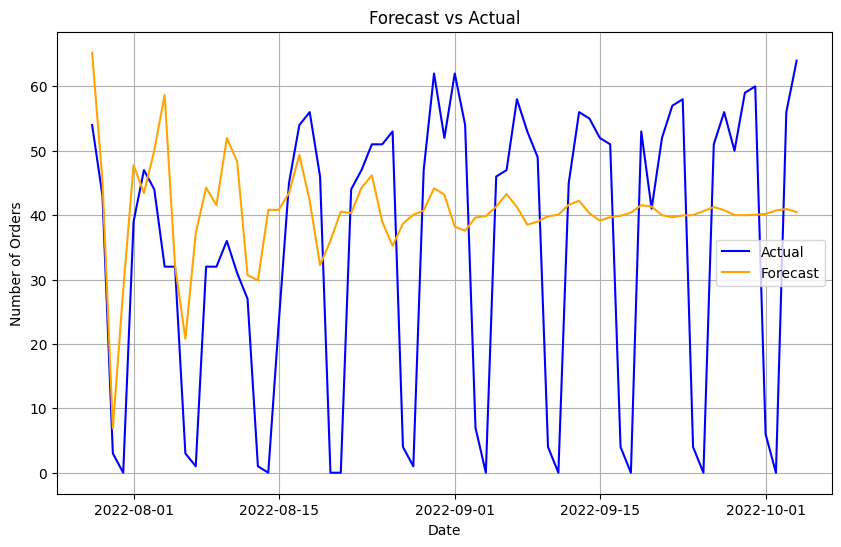

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(val.index, val['NUMBER OF ACTUAL ORDERS'], label='Actual', color='blue')
plt.plot(val.index, forecast, label='Forecast', color='orange')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid()
plt.show()


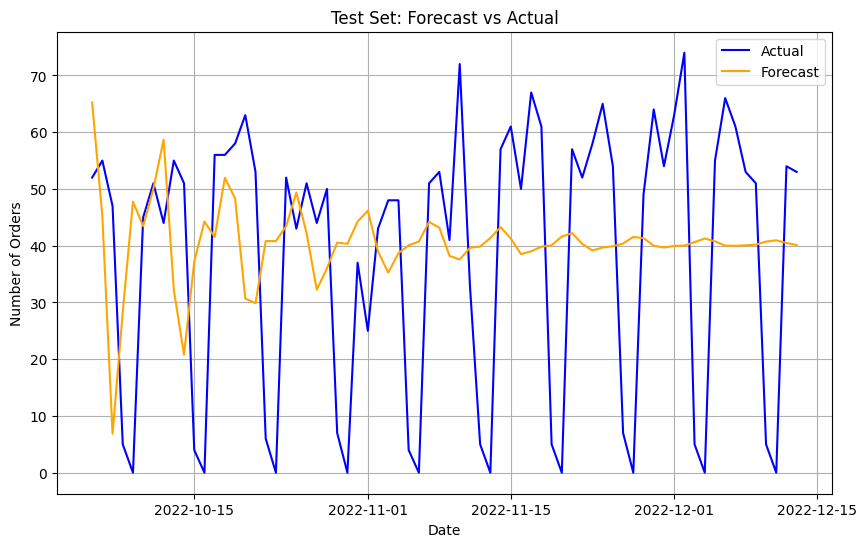

In [37]:
test_forecast = arima_result.forecast(steps=len(test))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['NUMBER OF ACTUAL ORDERS'], label='Actual', color='blue')
plt.plot(test.index, test_forecast, label='Forecast', color='orange')
plt.title('Test Set: Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid()
plt.show()
